#### AM: 1115201700119  Θωμάς Παπαθυμιόπουλος
#### ΑΜ: 1115201700102  Ιωάννης Νάνας
### Ερώτημα 1
#### Δημιουργία του train.csv

Αρχικά κάνουμε Import τις απαραίτητες βιβλιοθήκες καθώς και γίνεται η ανάγνωση των απαραίτητων csv αρχείων.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

march_listings = pd.read_csv('./data/march/listings.csv')
april_listings = pd.read_csv('./data/april/listings.csv')
febrouary_listings = pd.read_csv('./data/febrouary/listings.csv')

Πρόσθετουμε μια έξτρα στήλη 'month' σε κάθε dataframe μήνα που έχουμε ανοιχτό και αναθέτουμε την κατάλληλη τιμή. Φτιάχνουμε μια λίστα με τους τίτλους των στηλών  που θα κρατήσουμε στο train.csv. Ενώνουμε τα αρχεία των μηνών και διαγράφουμε τις στήλες που δεν θέλουμε. Αφαιρούμε από το train όλες τις σειρές με missing data και διορθώνουμε τα λάθη στην στήλη 'zipcode' και αποθηκεύουμε το train.csv. Το primary key κάθε εγγραφής στο train.csv είναι id + month.

In [2]:
febrouary_listings.insert(1,'month',2)
march_listings.insert(1,'month',3)
april_listings.insert(1,'month',4)

wanted_columns = ['id', 'month', 'zipcode', 'transit', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews', 'neighbourhood', 'name', 'latitude', 'longitude', 'last_review', 'instant_bookable', 'host_since', 'host_response_rate', 'host_identity_verified', 'host_has_profile_pic', 'first_review', 'description', 'city', 'cancellation_policy', 'bed_type', 'bathrooms', 'accommodates', 'amenities', 'room_type', 'property_type', 'price', 'availability_365', 'minimum_nights']

train = pd.concat([febrouary_listings,march_listings,april_listings])

for col in train.columns:
    if col not in wanted_columns:
        del train[col]

train.dropna(inplace = True)
train['zipcode'] = train['zipcode'].str.replace(r' ', '')
train['zipcode'] = train['zipcode'].str.replace(r'.', '')

train.to_csv(r'train.csv', index = False)

#### 1.1
Διαβάζουμε το αρχείο train.csv και κρατάμε όλες τις μοναδικές τιμές της στήλης 'room_type' του train.csv. Κάνουμε groupby με id για να κρατήσουμε μια εγγραφή για κάθε διαμέρισμα. Μετράμε πόσες φορές εμφανίζεταικάθε room_type και φτίαχνουμε ένα ραβδόγραμμα με αυτά.

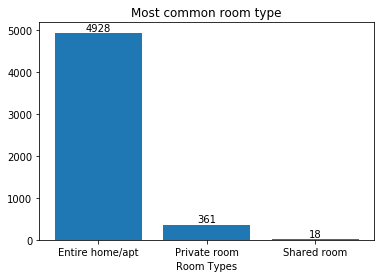

In [3]:
train = pd.read_csv('train.csv')

fig, ax = plt.subplots()
 
room_types = train.room_type.unique()
temp_df = train[['id', 'room_type']]
group = temp_df.groupby('id').agg({'room_type':'max'})
room_type_counts = group.room_type.value_counts()


ax.set_xlabel('Room Types')
ax.set_title('Most common room type')

for i in range(len(room_types)):
    plt.text(x = room_types[i], y = room_type_counts[i] ,s = room_type_counts[i], horizontalalignment='center', verticalalignment='bottom')

ax.bar(room_types, room_type_counts)
plt.show()

#### 1.2
Τροποποιούμε την στήλη price έτσι ώστε να μπορούμε να την διαχειριστούμε. Κάνουμε groupby με month και κρατάμε τον μέσο όρο για το price. Φτιάχνουμε ένα  διάγραμμα που δείχνει την μεταβολη της μέσης τιμής ανά μήνα.

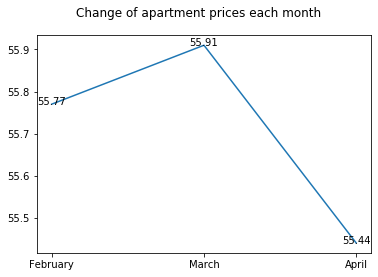

In [4]:
train = pd.read_csv('train.csv')

temp_df = train[['id', 'month', 'price']]
temp_df['price'] = temp_df['price'].str.replace(r'$', '')
temp_df['price'] = temp_df['price'].str.replace(r',', '')
temp_df['price'] = temp_df['price'].astype(float)
prices = temp_df.groupby('month')['price'].mean().round(2)
months = ['February','March','April']

plt.plot(months, prices)
plt.suptitle('Change of apartment prices each month')

for a,b in zip(months, prices): 
    plt.text(a, b, str(b), horizontalalignment='center')

plt.show()

#### 1.3
Κάνουμε groupby με 'neighbourhood' και κάνουμε sort με βάση το άθροισμα του 'number_of_reviews'. Δημιουργούμε ένα ραβδόγραμμα με τις 5 πιο σχολιασμένες γειτονιές. 

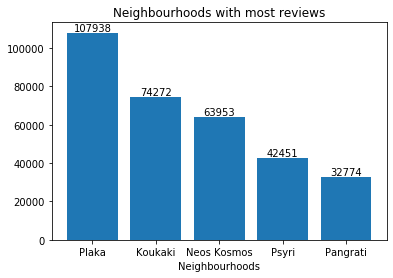

In [5]:
train = pd.read_csv('train.csv')

temp_df = train[['neighbourhood', 'number_of_reviews']]
group = temp_df.groupby('neighbourhood').agg({'number_of_reviews':'sum'}).sort_values(by='number_of_reviews', ascending=False)
group = group.head(5)

fig, ax = plt.subplots()

ax.set_xlabel('Neighbourhoods')
ax.set_title('Neighbourhoods with most reviews')

neighbourhood = []
reviews = []
for i in range(len(group.index)):
    neighbourhood.append(group.index[i])
    reviews.append(group.number_of_reviews[i])

for i in range(len(neighbourhood)):
    plt.text(x = neighbourhood[i], y = reviews[i] ,s = reviews[i], horizontalalignment='center', verticalalignment='bottom')

ax.bar(neighbourhood, reviews)
plt.show()

#### 1.4
Κάνουμε groupby με 'id' και κρατάμε την στήλη neighbourhood. Μετράμε τις τιμές του neighbourhood και φτιάχνουμε ένα ραβδόγραμμα που δείχνει τα property counts για κάθε γειτονιά. 

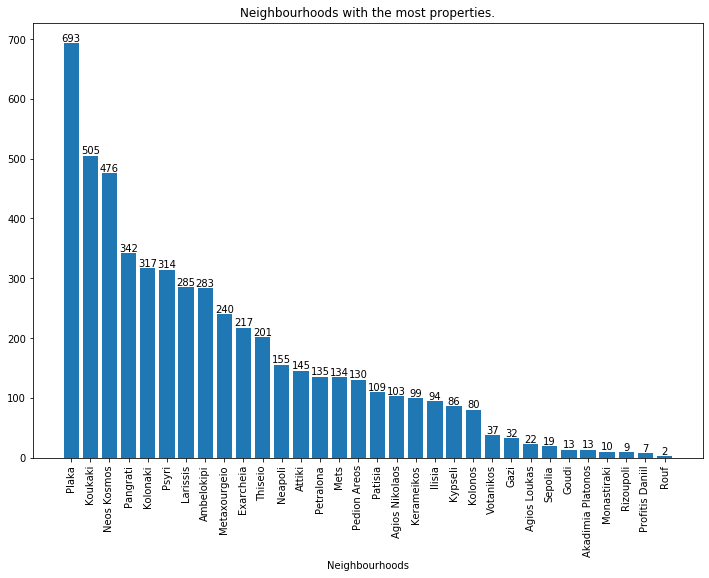

In [6]:
train = pd.read_csv('train.csv')

temp_df = train[['id', 'neighbourhood']]

group = temp_df.groupby('id').agg({'neighbourhood':'max'})

prop = group.neighbourhood.value_counts()

fig, ax = plt.subplots(figsize=(12,8))

ax.set_xlabel('Neighbourhoods')
ax.set_title('Neighbourhoods with the most properties.')
plt.xticks(rotation=90)

for i in range(len(prop)):
    plt.text(x = prop.index[i], y = prop[i] ,s = prop[i], horizontalalignment='center', verticalalignment='bottom')

ax.bar(prop.index, prop)
plt.show()

#### 1.5
Για κάθε μήνα κάνουμε groupby με id και μετράμε πόσες φορές εμφανίζεται η κάθε τιμή του neighbourhood. Φτιάχνουμε τρεία ραβδογράμματα που δείχνουν τα property counts για κάθε γειτονιά τον συγκεκριμένο μήνα. 

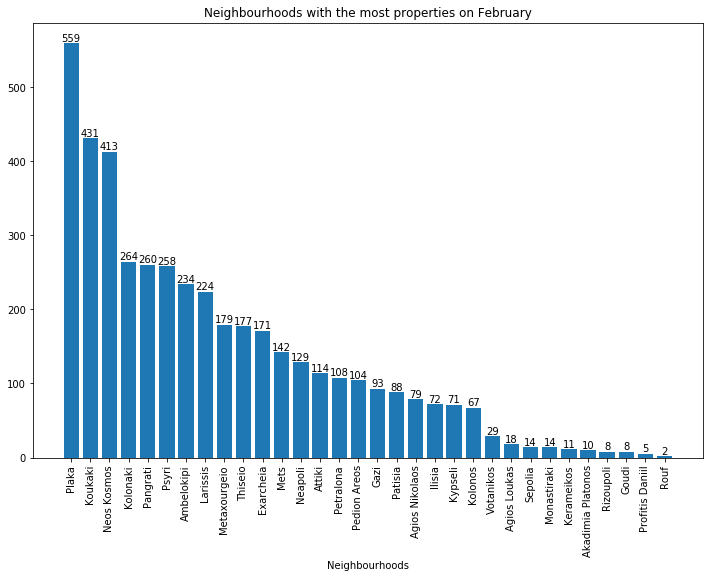

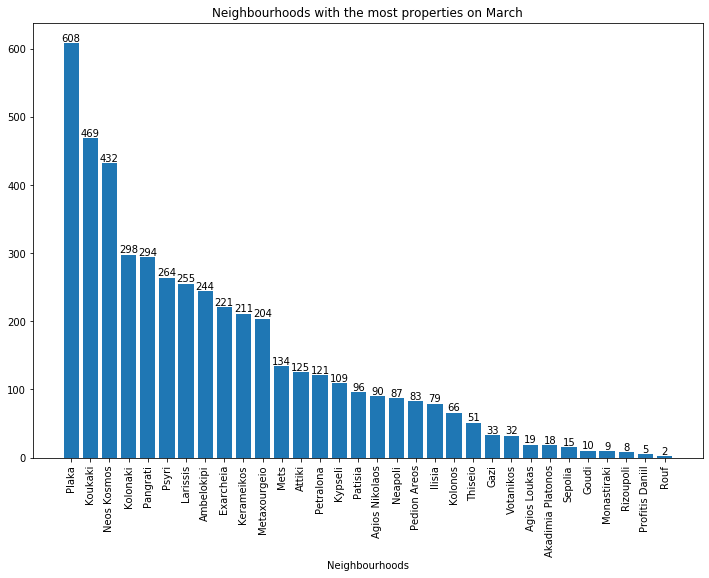

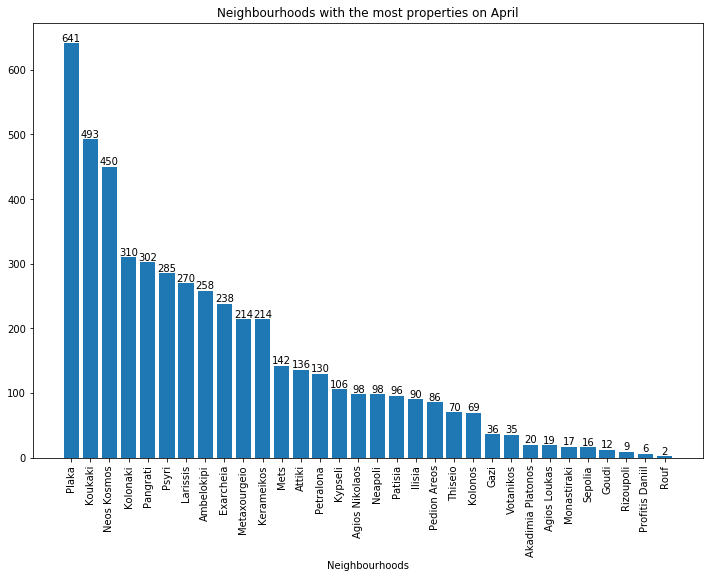

In [7]:
train = pd.read_csv('train.csv')

temp_df = train[['id', 'month','neighbourhood']]
months = temp_df.month.unique()
months_names = ['February','March','April']
props_per_neigh = []
for i,counter in zip(months,range(len(months))):
    df = temp_df[temp_df['month'] == i]
    temp = df[['id','neighbourhood']]
    group = temp.groupby('id').agg({'neighbourhood':'max'})
    prop = group.neighbourhood.value_counts()
    
    fig, ax = plt.subplots(figsize=(12,8))
    ax.set_xlabel('Neighbourhoods')
    plt.title('Neighbourhoods with the most properties on %s'%months_names[counter])
    plt.xticks(rotation=90)
    for z in range(len(prop.index)):
        plt.text(x = prop.index[z], y = prop[z] ,s = prop[z], horizontalalignment='center', verticalalignment='bottom')

    ax.bar(prop.index, prop)
    plt.show()
    del temp

#### 1.6
Βρίσκουμε τα counts για κάθε τιμή του neighbourhood και φτιάχνουμε το ιστόγραμμα τους.

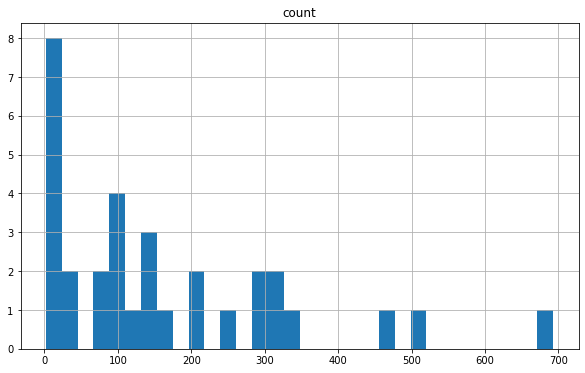

In [8]:
train = pd.read_csv('train.csv')

temp_df = train[['id', 'neighbourhood', 'room_type']]
group = temp_df.groupby('id').agg({'neighbourhood':'max', 'room_type':'max'}).reset_index()
group = group.groupby('neighbourhood').size().reset_index()
group = group.rename(columns={0:'count'})

group.hist(column='count', figsize=[10, 6], bins = 32)
plt.show()

#### 1.7
Κρατάμε από το train.csv τις στήλες 'id', 'neighbourhood' και 'room_type' και κάνουμε groupby μεμ βάση γειτονιά και τύπο δωματίου ενώ κρατάμε το size τους. Κρατάμε όλες τις γειτονιές σε μια λίστα neighbourhood.

In [9]:
train = pd.read_csv('train.csv')

temp_df = train[['id', 'neighbourhood', 'room_type']]
group = temp_df.groupby('id').agg({'neighbourhood':'max', 'room_type':'max'}).reset_index()
group = group.groupby(['neighbourhood', 'room_type']).size().reset_index()
group = group.rename(columns={0:'count'})

neighbourhoods = pd.DataFrame(columns=['neighbourhood'])
neighbourhoods['neighbourhood'] = train['neighbourhood']
neighbourhoods = neighbourhoods.sort_values(by='neighbourhood')
neighbourhoods = neighbourhoods.drop_duplicates(subset = 'neighbourhood') 

Για κάθε τύπο δωματίου ανά γειτονιά δημιουργούμε μπάρες με το πλήθος κάθε τύπου δωματίου.

In [10]:
bars1 = group[group.room_type == 'Entire home/apt']                
for neigh in neighbourhoods['neighbourhood']:
    newRow = {'neighbourhood' : neigh , 'room_type':'Entire home/apt', 'count': 0}
    if neigh not in bars1['neighbourhood']:
        bars1 = bars1.append(newRow, ignore_index = True)
bars1 = bars1.drop_duplicates(subset = 'neighbourhood', keep="first") 
bars1 = bars1.sort_values(by ='neighbourhood')
bars1 = bars1['count']

bars2 = group[group.room_type == 'Private room']
for neigh in neighbourhoods['neighbourhood']:
    newRow = {'neighbourhood' : neigh , 'room_type':'Private room', 'count': 0}
    if neigh not in bars2['neighbourhood']:
       bars2 = bars2.append(newRow, ignore_index = True)
bars2 = bars2.drop_duplicates(subset = 'neighbourhood', keep="first") 
bars2 = bars2.sort_values(by ='neighbourhood')
bars2 = bars2['count']

bars3 = group[group.room_type == 'Shared room']
for neigh in neighbourhoods['neighbourhood']:
    newRow = {'neighbourhood' : neigh , 'room_type':'Shared room', 'count': 0}
    if neigh not in bars3['neighbourhood']:
        bars3 = bars3.append(newRow, ignore_index = True)
bars3 = bars3.drop_duplicates(subset = 'neighbourhood', keep="first") 
bars3 = bars3.sort_values(by ='neighbourhood')
bars3 = bars3['count']

Φτιάχνουμε την θέση και τις παραμέτρους κάθε μπάρας και τυπώνουμε το αντίστοιχο ραβδόγραμμα.

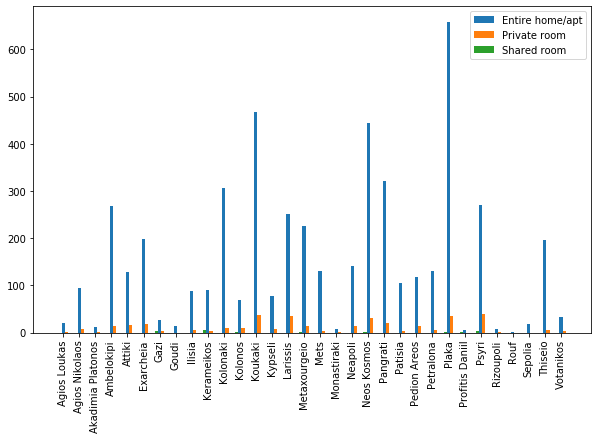

In [11]:
x = np.arange(len(neighbourhoods))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x, bars1, width, label='Entire home/apt')
rects2 = ax.bar(x + width, bars2, width, label='Private room')
rects3 = ax.bar(x - width, bars3, width, label='Shared room')

ax.set_xticks(x)
ax.set_xticklabels(neighbourhoods['neighbourhood'], rotation=90)

# Create legend & Show graphic
plt.legend()
plt.show()

#### 1.8
Τροποποιούμε την στήλη price ώστε να έχει διαχειρίσημες τιμές και κρατάμε την μέση τιμή τους. Φτιάχνουμε ένα ραβδόγραμα για τον πιο ακριβό κατα μέσο όρο τύπο δωματίου.

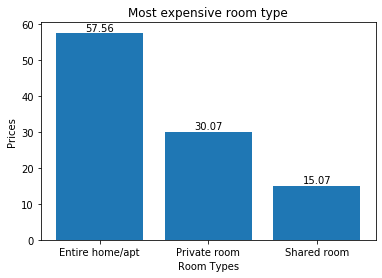

In [12]:
train = pd.read_csv('train.csv')

temp_df = train[['id', 'room_type', 'price']]
temp_df['price'] = temp_df['price'].str.replace(r'$', '')
temp_df['price'] = temp_df['price'].str.replace(r',', '')
temp_df['price'] = temp_df['price'].astype(float)
prices = temp_df.groupby('room_type')['price'].mean().round(2).reset_index()

fig, ax = plt.subplots()

ax.set_xlabel('Room Types')
ax.set_ylabel('Prices')
ax.set_title('Most expensive room type')

for i in range(len(prices.room_type)):
    plt.text(x = prices.room_type[i] , y = prices.price[i] ,s = prices.price[i], horizontalalignment='center', verticalalignment='bottom')

ax.bar(prices.room_type, prices.price)
plt.show()

#### 1.9
Κρατάμε όλα τα διαμερίσματα του Φεβρουαρίου και τα εμφανίζουμε στις συντεταγμένες τους σε έναν διαδραστικό χάρτη με Pop up πληροφορία τον τύπο δωματίου.  

In [13]:
train = pd.read_csv('train.csv')
temp_df = train[['month', 'room_type', 'latitude', 'longitude']]
temp_df = temp_df[temp_df.month == 2]

locations = temp_df[['latitude', 'longitude']]
locationlist = locations.values.tolist()

athens = folium.Map(location=[37.9838, 23.7275], zoom_start=12) #Coords of Athens
for point in range(0, len(locationlist)):   
    folium.Marker(locationlist[point], popup=folium.Popup(temp_df['room_type'][point],parse_html=True)).add_to(athens)
athens

#### 1.10
Για κάθε ζητούμρνη στήλη εκτός των reviews φτιάχνουμε ένα ενιαίο κειμένο και το εκτυπώνουμε σε μορφή wordcloud.

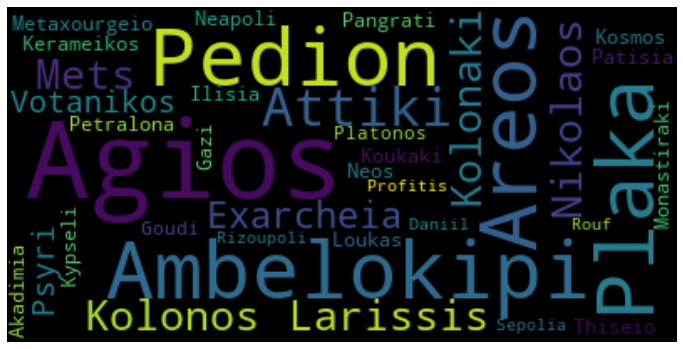

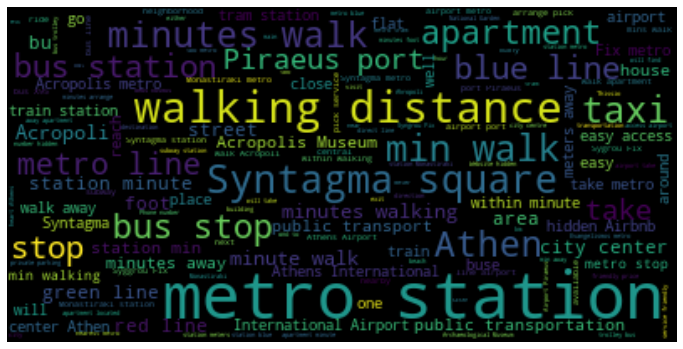

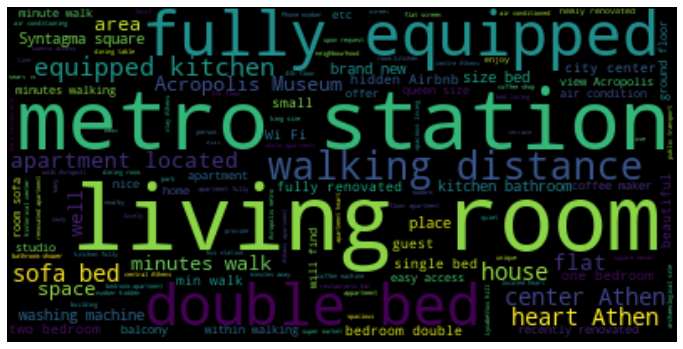

In [14]:
train = pd.read_csv('train.csv')
feb_rev = pd.read_csv('./data/febrouary/reviews.csv')
march_rev = pd.read_csv('./data/march/reviews.csv')
april_rev = pd.read_csv('./data/april/reviews.csv')

temp_df = train[['neighbourhood','transit', 'description', 'last_review' , 'month' , 'id']]

for i,col in zip(range(3),temp_df.columns):
    group = temp_df[[col]].drop_duplicates()
    text = " ".join(word for word in group[col])
    wordcloud = WordCloud().generate(text)

    # Display the generated image:
    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

Για την στήλη reviews. Σε κάθε μήνα αντιστοιχούμε την ημερομηνία του last_review και id με το date και listing_id του αντίστοιχου review στο review.csv και ενώνουμε όλα τα comments σε ενιαίο κείμενο. Ενώνουμε τα κείμενα των τρειών μηνών και εκτυπώνουμε το wordcloud τους.

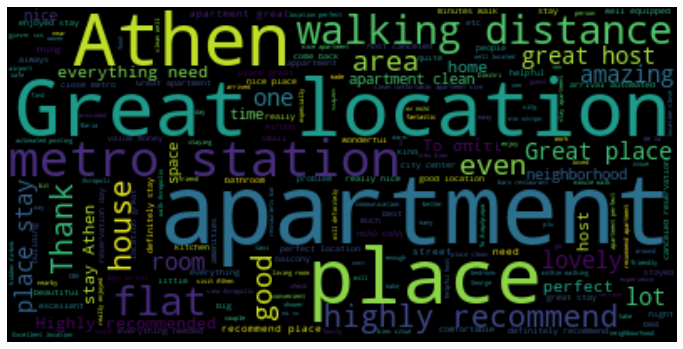

In [15]:
feb_df = temp_df[temp_df.month==2]
feb_df.rename(columns = {'last_review':'date'}, inplace = True)
feb_rev =     feb_rev[['date', 'comments' , 'listing_id']]
feb_rev.rename(columns = {'listing_id':'id'}, inplace = True)
feb_coms = pd.merge(feb_df, feb_rev, how ='inner', on =['date','id'])
feb_coms.dropna(inplace = True)

march_rev = march_rev[['date', 'comments' , 'listing_id']]
march_df = temp_df[temp_df.month==3]
march_df.rename(columns = {'last_review':'date'}, inplace = True)
march_rev =     march_rev[['date', 'comments' , 'listing_id']]
march_rev.rename(columns = {'listing_id':'id'}, inplace = True)
march_coms = pd.merge(march_df, march_rev, how ='inner', on =['date','id'])
march_coms.dropna(inplace = True)

april_rev = april_rev[['date', 'comments' , 'listing_id']]
april_df = temp_df[temp_df.month==4]
april_df.rename(columns = {'last_review':'date'}, inplace = True)
april_rev =     april_rev[['date', 'comments' , 'listing_id']]
april_rev.rename(columns = {'listing_id':'id'}, inplace = True)
april_coms = pd.merge(april_df, april_rev, how ='inner', on =['date','id'])
april_coms.dropna(inplace = True)

text = " ".join(word for word in feb_coms['comments'])
text1 = " ".join(word for word in march_coms['comments'])
text2 = " ".join(word for word in april_coms['comments'])
text = text + ' ' + text1 + ' ' + text2

wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### 1.11
Για κάθε μήνα υπολογίζουμε τον μέσο όρο των number_of_reviews και φτιάχνουμε γράφημα που δείχνει την μεταβολή του μέσου όρου ανά μήνα.

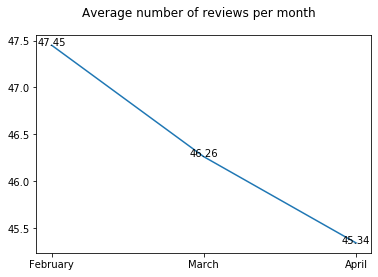

In [16]:
#1.11
train = pd.read_csv('train.csv')

temp_df = train[['id', 'month', 'number_of_reviews']]
reviews = temp_df.groupby('month')['number_of_reviews'].mean().round(2)
months = ['February','March','April']

plt.plot(months, reviews)
plt.suptitle('Average number of reviews per month')

for a,b in zip(months, reviews): 
    plt.text(a, b, str(b), horizontalalignment='center')

plt.show()

#### 1.12
#### Ποιό είναι το συνηθέστερο property_type?

Μετράμε την συχνότητα του κάθε property_type και τα εκτυπώνουμε σε μορφή pie chart.

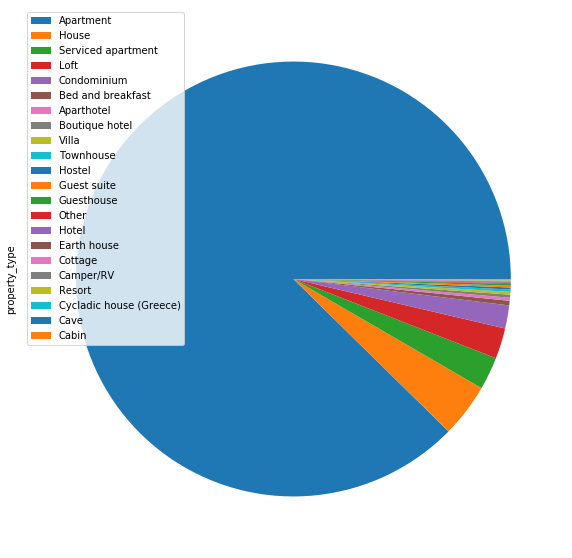

In [17]:
train = pd.read_csv('train.csv')

temp_df = train[['id','property_type']]
temp_df = temp_df.groupby('id').agg({'property_type':'max'}).reset_index()
property_type_counts = temp_df.property_type.value_counts()

plot = property_type_counts.plot.pie(y='property type count', figsize=(10, 10),labels=None)
plt.legend(property_type_counts.index)

plt.show()

### Ερώτημα 3
Κρατάμε τις στήλες που θέλουμε και δημιουργούμε την ζητούμενη.

In [18]:
import string
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

train = pd.read_csv('train.csv')
temp_df = train[[ 'id' , 'name' , 'description' ]]
temp_df = temp_df.groupby('id').agg({'name':'max', 'description':'max'}).reset_index()
temp_df["Corpus"] = temp_df["name"] + " " + temp_df['description']
n = temp_df["Corpus"].value_counts().sum()
temp_df = temp_df.reset_index()
temp_df = temp_df[['Corpus', 'id', 'name' , 'description']]

Καθαρίζουμε την στήλη Corpus από stopwords και puncuations.

In [19]:
stopwords = text.ENGLISH_STOP_WORDS

def remove_stopwords(text):
    phrases = []
    for sentence in text:
        sentence_without_stopwords = [word.lower() for word in sentence.split() if word not in stopwords]
        phrases.append(sentence_without_stopwords)
    return phrases


punctuations = '''!()-[]{};:'",<>./?@#$%^&*_~•❤️⭐️♥'''

for d,i in zip(temp_df.Corpus,range(len(temp_df.Corpus))):
    no_punct = ""
    for char in d:
        if (char not in punctuations):
            no_punct = no_punct + char
    temp_df.Corpus[i] = no_punct

temp_df.Corpus = remove_stopwords(temp_df.Corpus)
for i in range(len(temp_df.Corpus)):
    temp_df.Corpus[i] = " ".join(w for w in temp_df.Corpus[i])

#### 3.1
Δημιουργούμε τον TF-IDF vector της Corpus με όνομα x.

In [20]:
vectorizer = TfidfVectorizer(ngram_range = (1, 2)) 
x = vectorizer.fit_transform(temp_df['Corpus']) 

#### 3.2
Δημιουργούμε τον πίνακα y πού έχει τις τιμές ομοιότητας (cosine_similarity).

In [21]:
from sklearn.metrics.pairwise import cosine_similarity
y = cosine_similarity(x)

Για την αποφυγή διπλότυπων αποτελεσμάτων,κρατάμε τον άνω τριγωνικό πίνακα του y(χωρίς την διαγώνιο). Βρίσκουμε επαναληπτικά το μέγιστο,το τοποθετούμε στο dict και του αναθέτουμε την τιμή -1 για να μην το ξαναπάρουμε.  

In [22]:
Dict = dict()
y_upper = np.triu(y, k=1)
for k in range(100):
    i,j = np.unravel_index(y_upper.argmax(), y_upper.shape)
    Dict.update({temp_df.id[i]:temp_df.id[j]})
    y_upper[i][j] = -1

#### 3.3
Η συνάρτηση find_topn_similar_ids βρίσκει την γραμμή του ζητούμενου id στον πίνακα y (cosine similarity). Αρχικοποιεί την τιμή της διαγωνίου με -1 για να μην εκτυπώνει ως το πιο όμοιο id τον εαθτό του και μετά επαναληπτικά βρίσκει την max similarity της γραμμής την εκτυπώνει μαζί με τα απαραίτητα στοιχεία και την αρχικοποιεί με -1 για να μην την ξανπάρει η συνάρτηση max. 

In [23]:
def find_topn_similar_ids(id, N):
    id_index = temp_df[temp_df.id == id]
    id_index = id_index.index[0]
    row = y[id_index]
    row[id_index] = -1
    print('Recommending %d listings similar to Studio'%N)
    print('---------------------------------------------------------')
    for k in range(N):
        j = np.argmax(row)
        print('Recommended: %s'%temp_df.name[j])
        print('Description: %s'%temp_df.description[j])
        print('(score: %f)\n'%row[j])
        row[j] = -1

find_topn_similar_ids(17941955, 10)

Recommending 10 listings similar to Studio
---------------------------------------------------------
Recommended: 4 R00M with BALCONY ACROPOLIS VIEW  {2beds_3ppl}
Description: Private room in a 155sqm apt with 8 other rooms and a lounge, 2 perfectly clean communal bathrooms (cleaned - disinfected daily by professionals) . The room has LOCK, A/C, HIGH SPEED WIFI, access to a huge BALCONY with AMAZING VIEW to the ACROPOLIS and the AEGEAN SEA. PERFECTLY LOCATED in the heart of Athens, EASY ACCESS FROM/TO AIRPORT and PORT, IN WALKING DISTANCE FROM ALL THE ATTRACTIONS. Sheets, towels, hairdryers, shampoo, bathfoam, maps, kettle, fridge provided. No kitchen provided. Comfortable minimal private room with huge balcony , amazing view to the Acropolis and the Aegean sea, lock, A/C, high speed wifi and access to a lounge.  The apt is 150sq.m. with  2 communal bathrooms (each one has a shower and a toilet) with 8 other rooms. No kitchen provided but there is a refrigderator and a kettle.  For the

#### 3.4
Από την στήλη corpus του temp_df δημιουργούμε ένα ενιάιο κείμενο το οποίο το κάνουμε tokenize και βρίσκουμε τα 10 πιο συχνά ζευγάρια λέξεων με την χρήση της BigramCollocationFinder. 

In [24]:
import nltk
from nltk.collocations import BigramCollocationFinder

corpus = " ".join(temp_df.Corpus)
bag = nltk.wordpunct_tokenize(corpus)

bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(bag)
finder.nbest(bigram_measures.pmi, 10)

[('0600am', '0030am'),
 ('0730', 'rearrangement'),
 ('1430', '1700'),
 ('14stop', '37min'),
 ('15001700', '11000700am'),
 ('165', 'terpsithea'),
 ('16metres', '62inches'),
 ('1830', 'aristocrats'),
 ('1953', 'celebrations'),
 ('19ου', 'αιώνα')]